In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

Check missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Check Duplicates

In [6]:
df.duplicated().sum()

0

check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

check statistics of data set

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring Data

In [10]:
print("Categories in 'gender' variable:      ",end="  ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:      ",end="  ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:      ",end="  ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:      ",end="  ")
print(df['lunch'].unique())


print("Categories in 'test_preparation_course' variable:      ",end="  ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:        ['female' 'male']
Categories in 'race/ethnicity' variable:        ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:        ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:        ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:        ['none' 'completed']


In [11]:
## define numerical and categorical feature
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

##print columns
print('We have {} numerical features :{}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features :{}'.format(len(categorical_features), categorical_features))

We have 3 numerical features :['math score', 'reading score', 'writing score']
We have 5 categorical features :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


adding coulumns for total score and average score

In [12]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [14]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less marks in Maths: {math_less_20}')
print(f'Number of students with less marks in writing: {writing_less_20}')
print(f'Number of students with less marks in reading: {reading_less_20}')



Number of students with less marks in Maths: 4
Number of students with less marks in writing: 3
Number of students with less marks in reading: 1


Histogram and kde

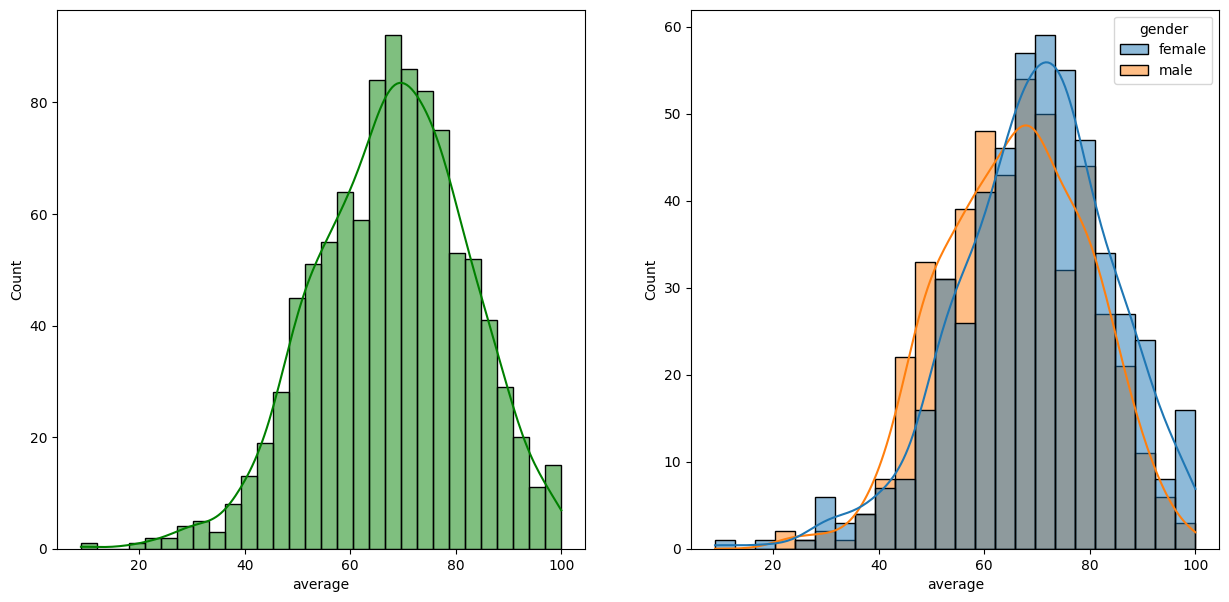

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

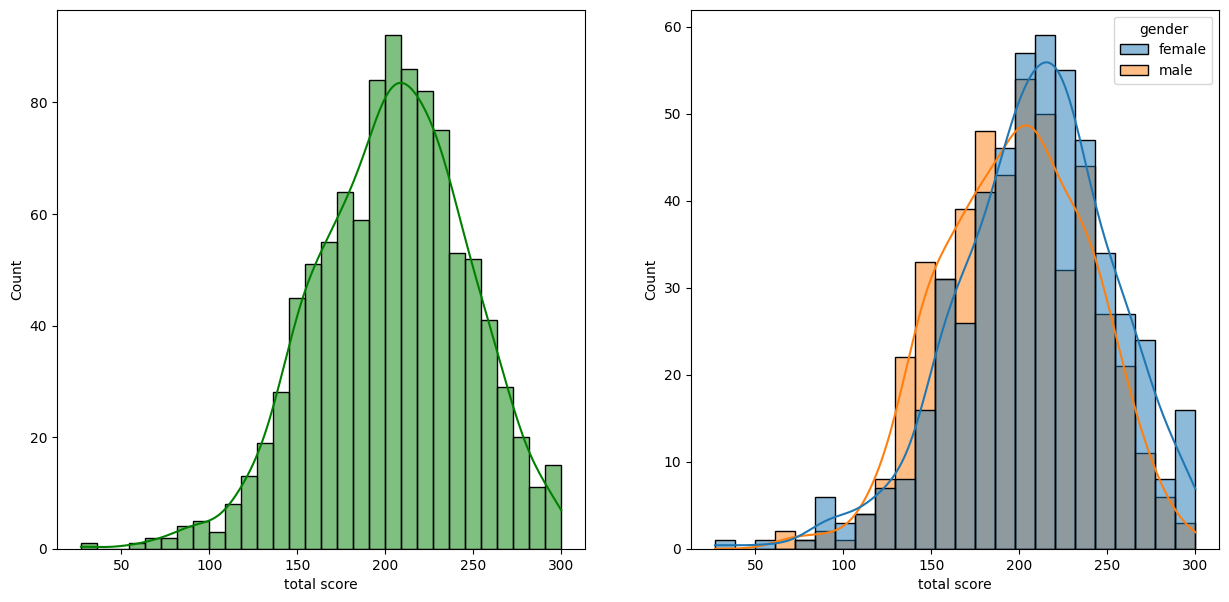

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Insights

Female students tend to perform well them male students

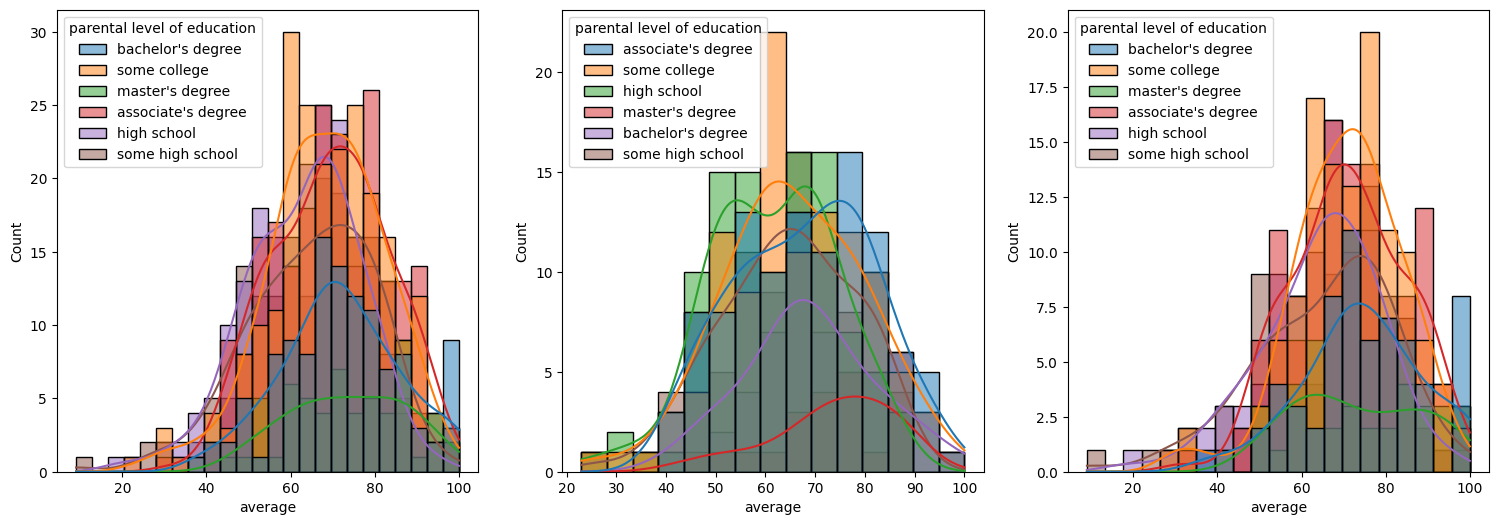

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

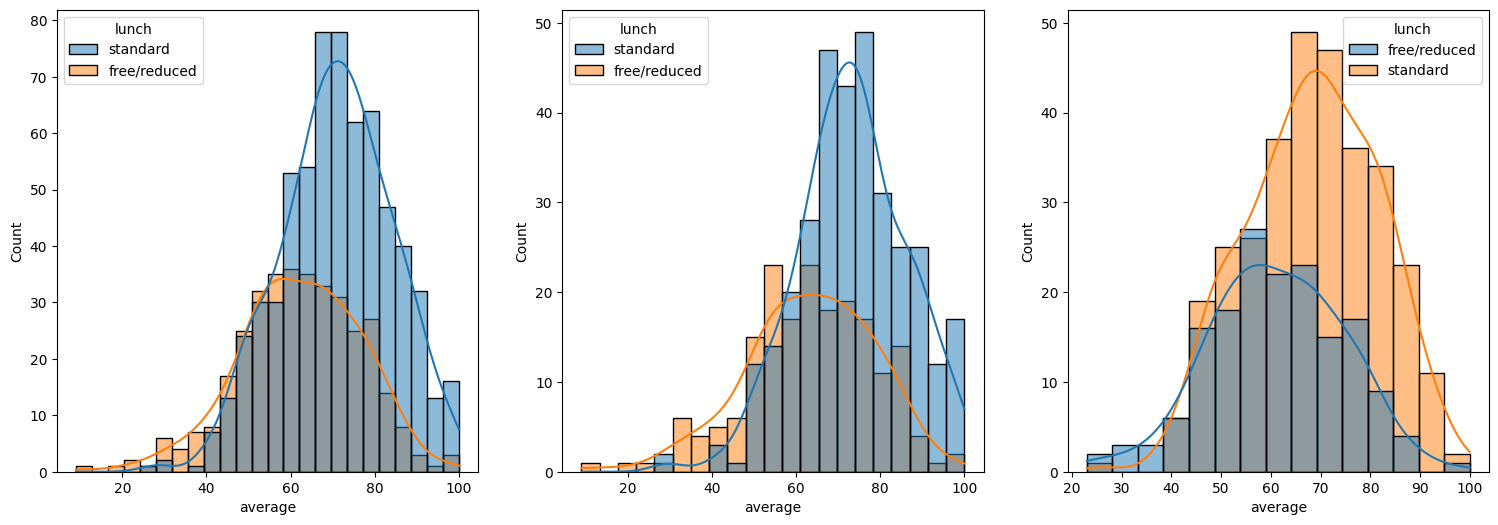

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

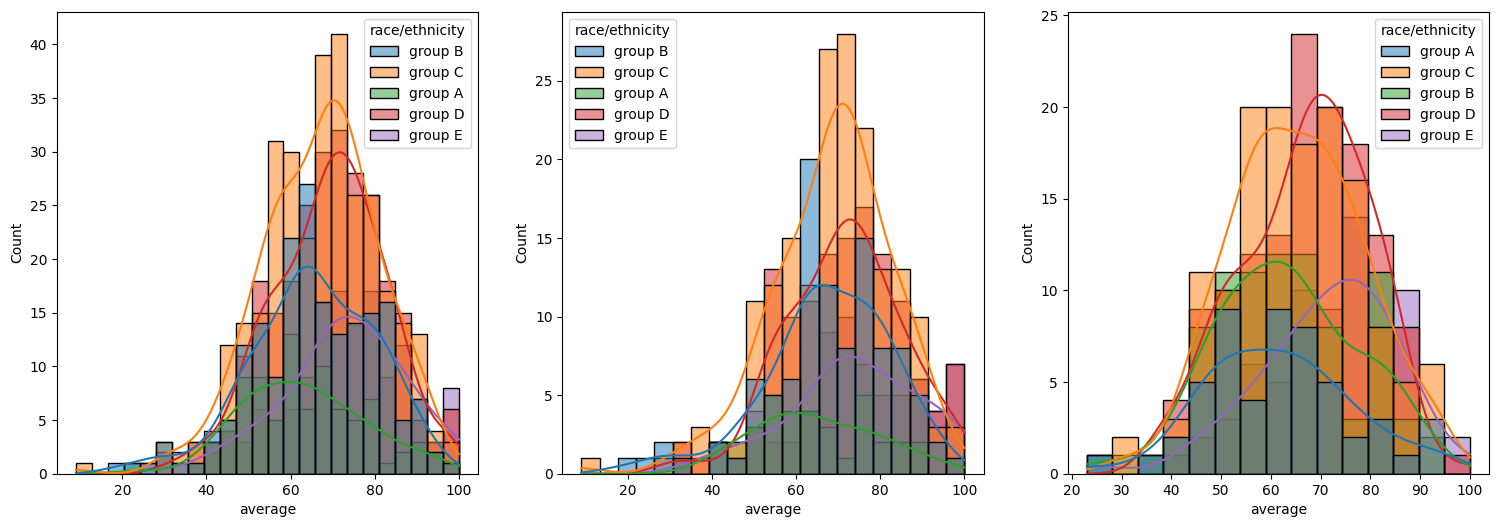

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
bx=sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
bx=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
bx=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

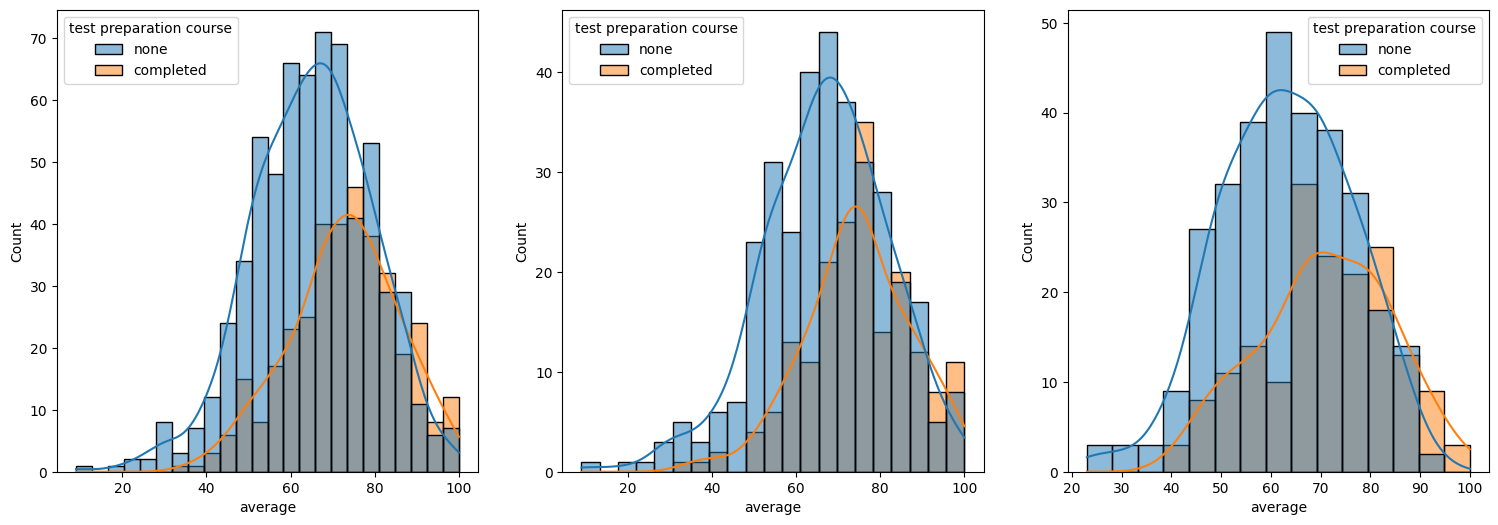

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='test preparation course')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='test preparation course')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='test preparation course')
plt.show()

In [21]:
# To find the actual name of parameter to be set
import matplotlib
for i in matplotlib.rc_params():
    if 'rotation' in i:
        print(i)

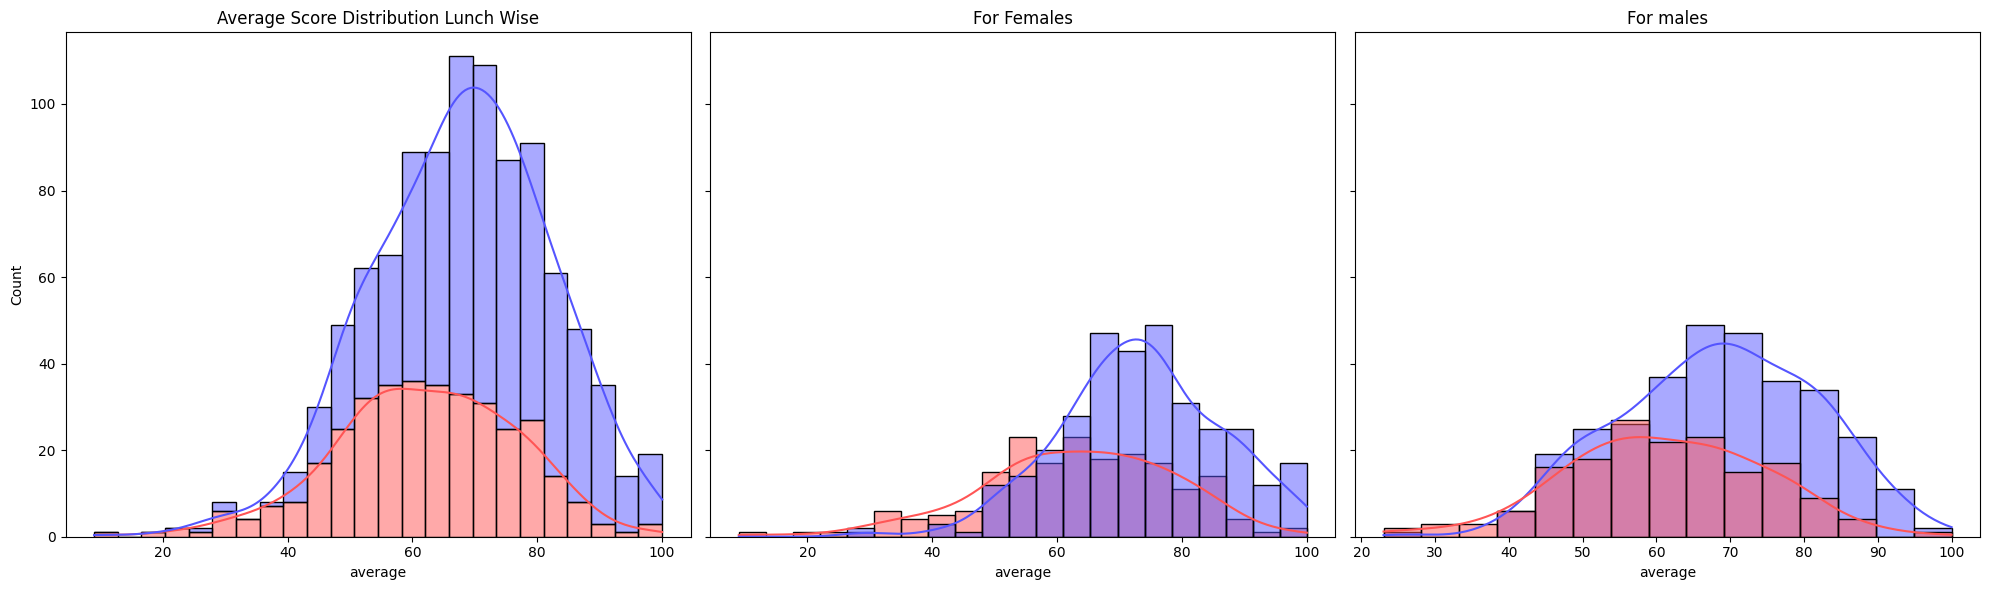

In [22]:
color = sns.color_palette('seismic',2) # create a palette with 2 colors (red and blue)
hue_colors = {"standard": color[0], "free/reduced": color[1]} # create a dictionary with the colors for each category # Need to do this as the males plot is taking altenating colors as compared to the rest.

#sns.set_palette(hue_colors) # set the palette as default

fig, axs = plt.subplots(1,3,figsize=(20,6),sharey=True) # create a figure with 3 subplots

sns.histplot(data=df,x='average',kde=True,hue='lunch',ax=axs[0],palette=hue_colors, multiple="stack",legend =False) # plot the distribution of average score lunch wise for both male and female
axs[0].set_title('Average Score Distribution Lunch Wise')

sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch',ax=axs[1],palette=hue_colors,legend=False)  # plot the distribution of average score lunch wise for both female
axs[1].set_title('For Females')

sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch',ax=axs[2],palette=hue_colors,legend= False)  # plot the distribution of average score lunch wise for both male \
axs[2].set_title('For males')

fig.tight_layout()
plt.show()

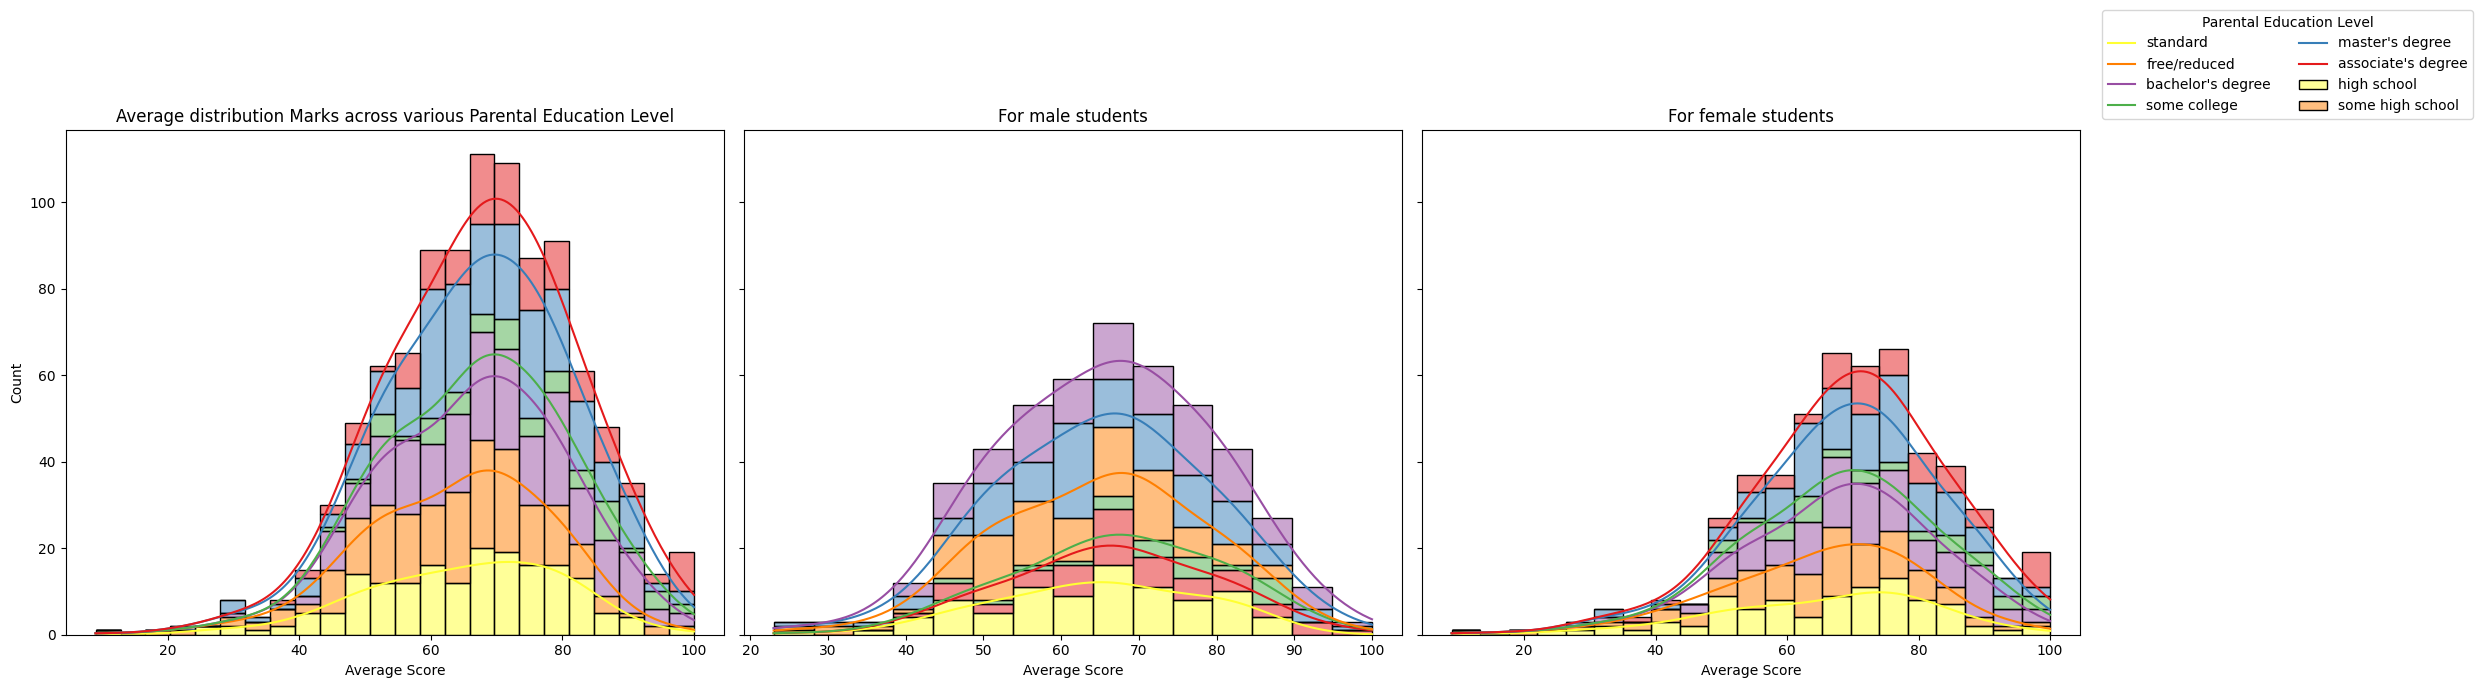

In [23]:
education_level = df['parental level of education'].unique()
color = sns.color_palette('Set1',len(education_level))

for i, level in enumerate(education_level): # create a dictionary with the colors for each category
    hue_colors[level] = color[i]

fig,axs = plt.subplots(1,3,sharey=True,figsize=(21,6))  

sns.histplot(data=df,x='average',kde=True,hue='parental level of education',ax = axs[0],palette=hue_colors,legend=False,multiple="stack")
axs[0].set_title('Average distribution Marks across various Parental Education Level')
axs[0].set_xlabel('Average Score')

sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education',ax = axs[1],palette=hue_colors,legend=False,multiple="stack")
axs[1].set_title('For male students')
axs[1].set_xlabel('Average Score')

sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education',ax = axs[2],palette=hue_colors,legend=False,multiple="stack")
axs[2].set_title('For female students')
axs[2].set_xlabel('Average Score')

fig.legend(loc='upper left', bbox_to_anchor=(1,1.15), ncol=2,labels = hue_colors.keys(),title='Parental Education Level')
fig.tight_layout()
plt.show()

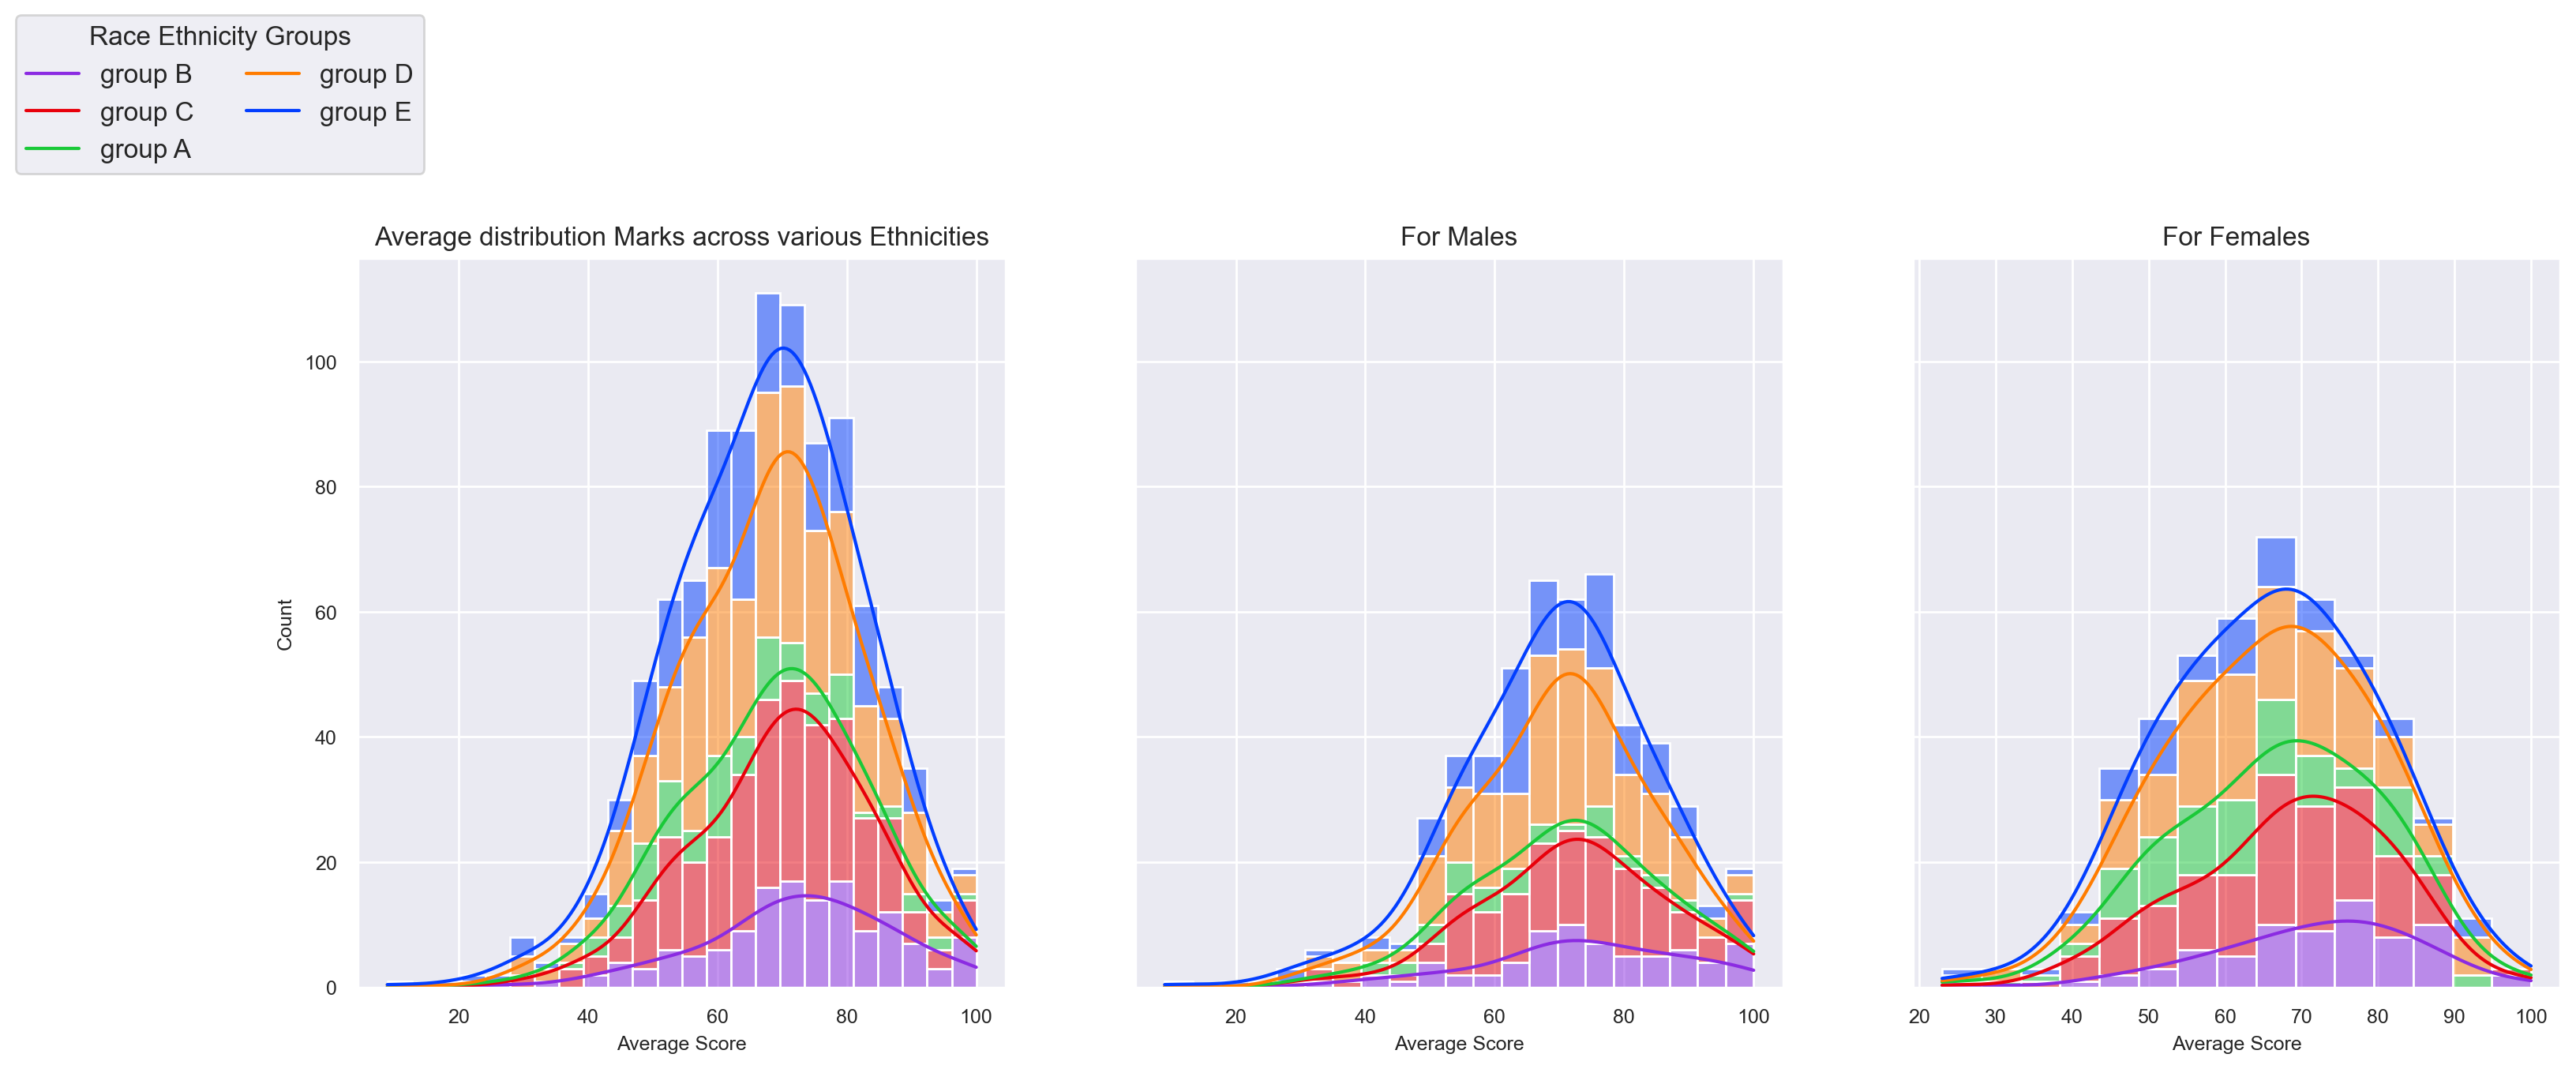

In [24]:
rcparams = {'figure.figsize':(18,9), 'axes.titlesize':12, 'axes.labelsize':9, 'xtick.labelsize':9, 'ytick.labelsize':9, 'legend.fontsize':12,'figure.dpi': 200}
sns.set(rc=rcparams)

fig,axs = plt.subplots(1,3,figsize=(18,6),sharey=True)
legend_labels = df['race/ethnicity'].unique()
sns.set_palette('bright')

sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity',ax=axs[0],legend = False,multiple="stack")
axs[0].set_title('Average distribution Marks across various Ethnicities')
axs[0].set_xlabel('Average Score')

sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity',ax=axs[1],legend = False,multiple="stack")
axs[1].set_title('For Males')
axs[1].set_xlabel('Average Score')

sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity',ax=axs[2],legend=False,multiple="stack")
axs[2].set_title('For Females')
axs[2].set_xlabel('Average Score')
#handles, labels = axs[0].get_legend_handles_labels()
fig.legend(loc='upper left', bbox_to_anchor=(0,1.15), ncol=2,labels = legend_labels,title='Race Ethnicity Groups')
plt.show()

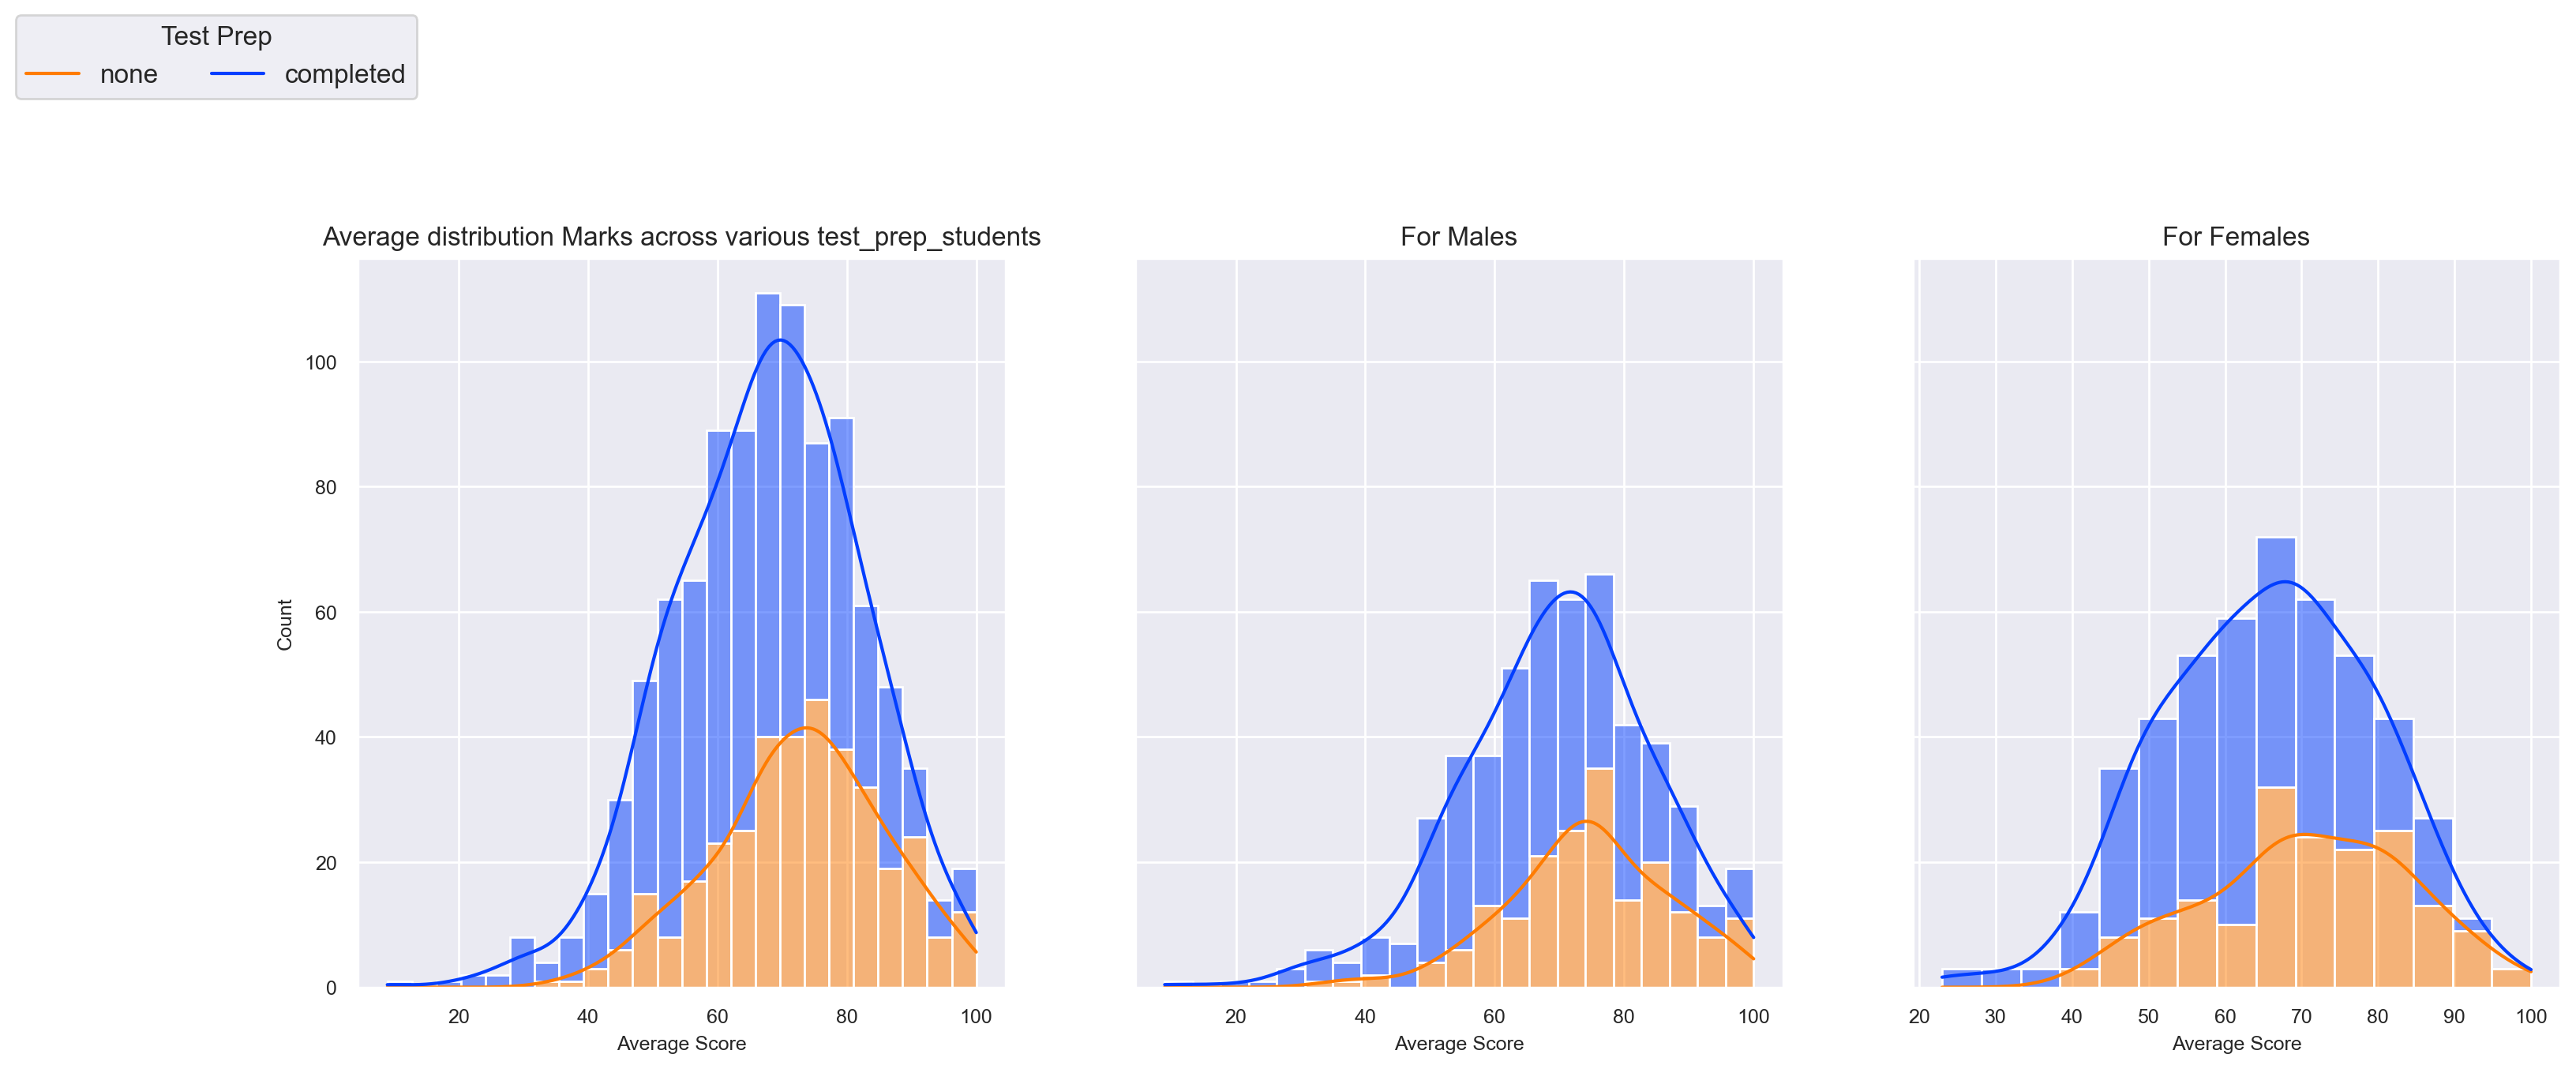

In [25]:
rrcparams = {'figure.figsize':(18,9), 'axes.titlesize':12, 'axes.labelsize':9, 'xtick.labelsize':9, 'ytick.labelsize':9, 'legend.fontsize':12,'figure.dpi': 200}
sns.set(rc=rcparams)

fig,axs = plt.subplots(1,3,figsize=(18,6),sharey=True)
legend_labels = df['test preparation course'].unique()
sns.set_palette('bright')

sns.histplot(data=df,x='average',kde=True,hue='test preparation course',ax=axs[0],legend = False,multiple="stack")
axs[0].set_title('Average distribution Marks across various test_prep_students')
axs[0].set_xlabel('Average Score')

sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='test preparation course',ax=axs[1],legend = False,multiple="stack")
axs[1].set_title('For Males')
axs[1].set_xlabel('Average Score')

sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='test preparation course',ax=axs[2],legend=False,multiple="stack")
axs[2].set_title('For Females')
axs[2].set_xlabel('Average Score')
#handles, labels = axs[0].get_legend_handles_labels()
fig.legend(loc='upper left', bbox_to_anchor=(0,1.15), ncol=2,labels = legend_labels,title='Test Prep')
plt.show()


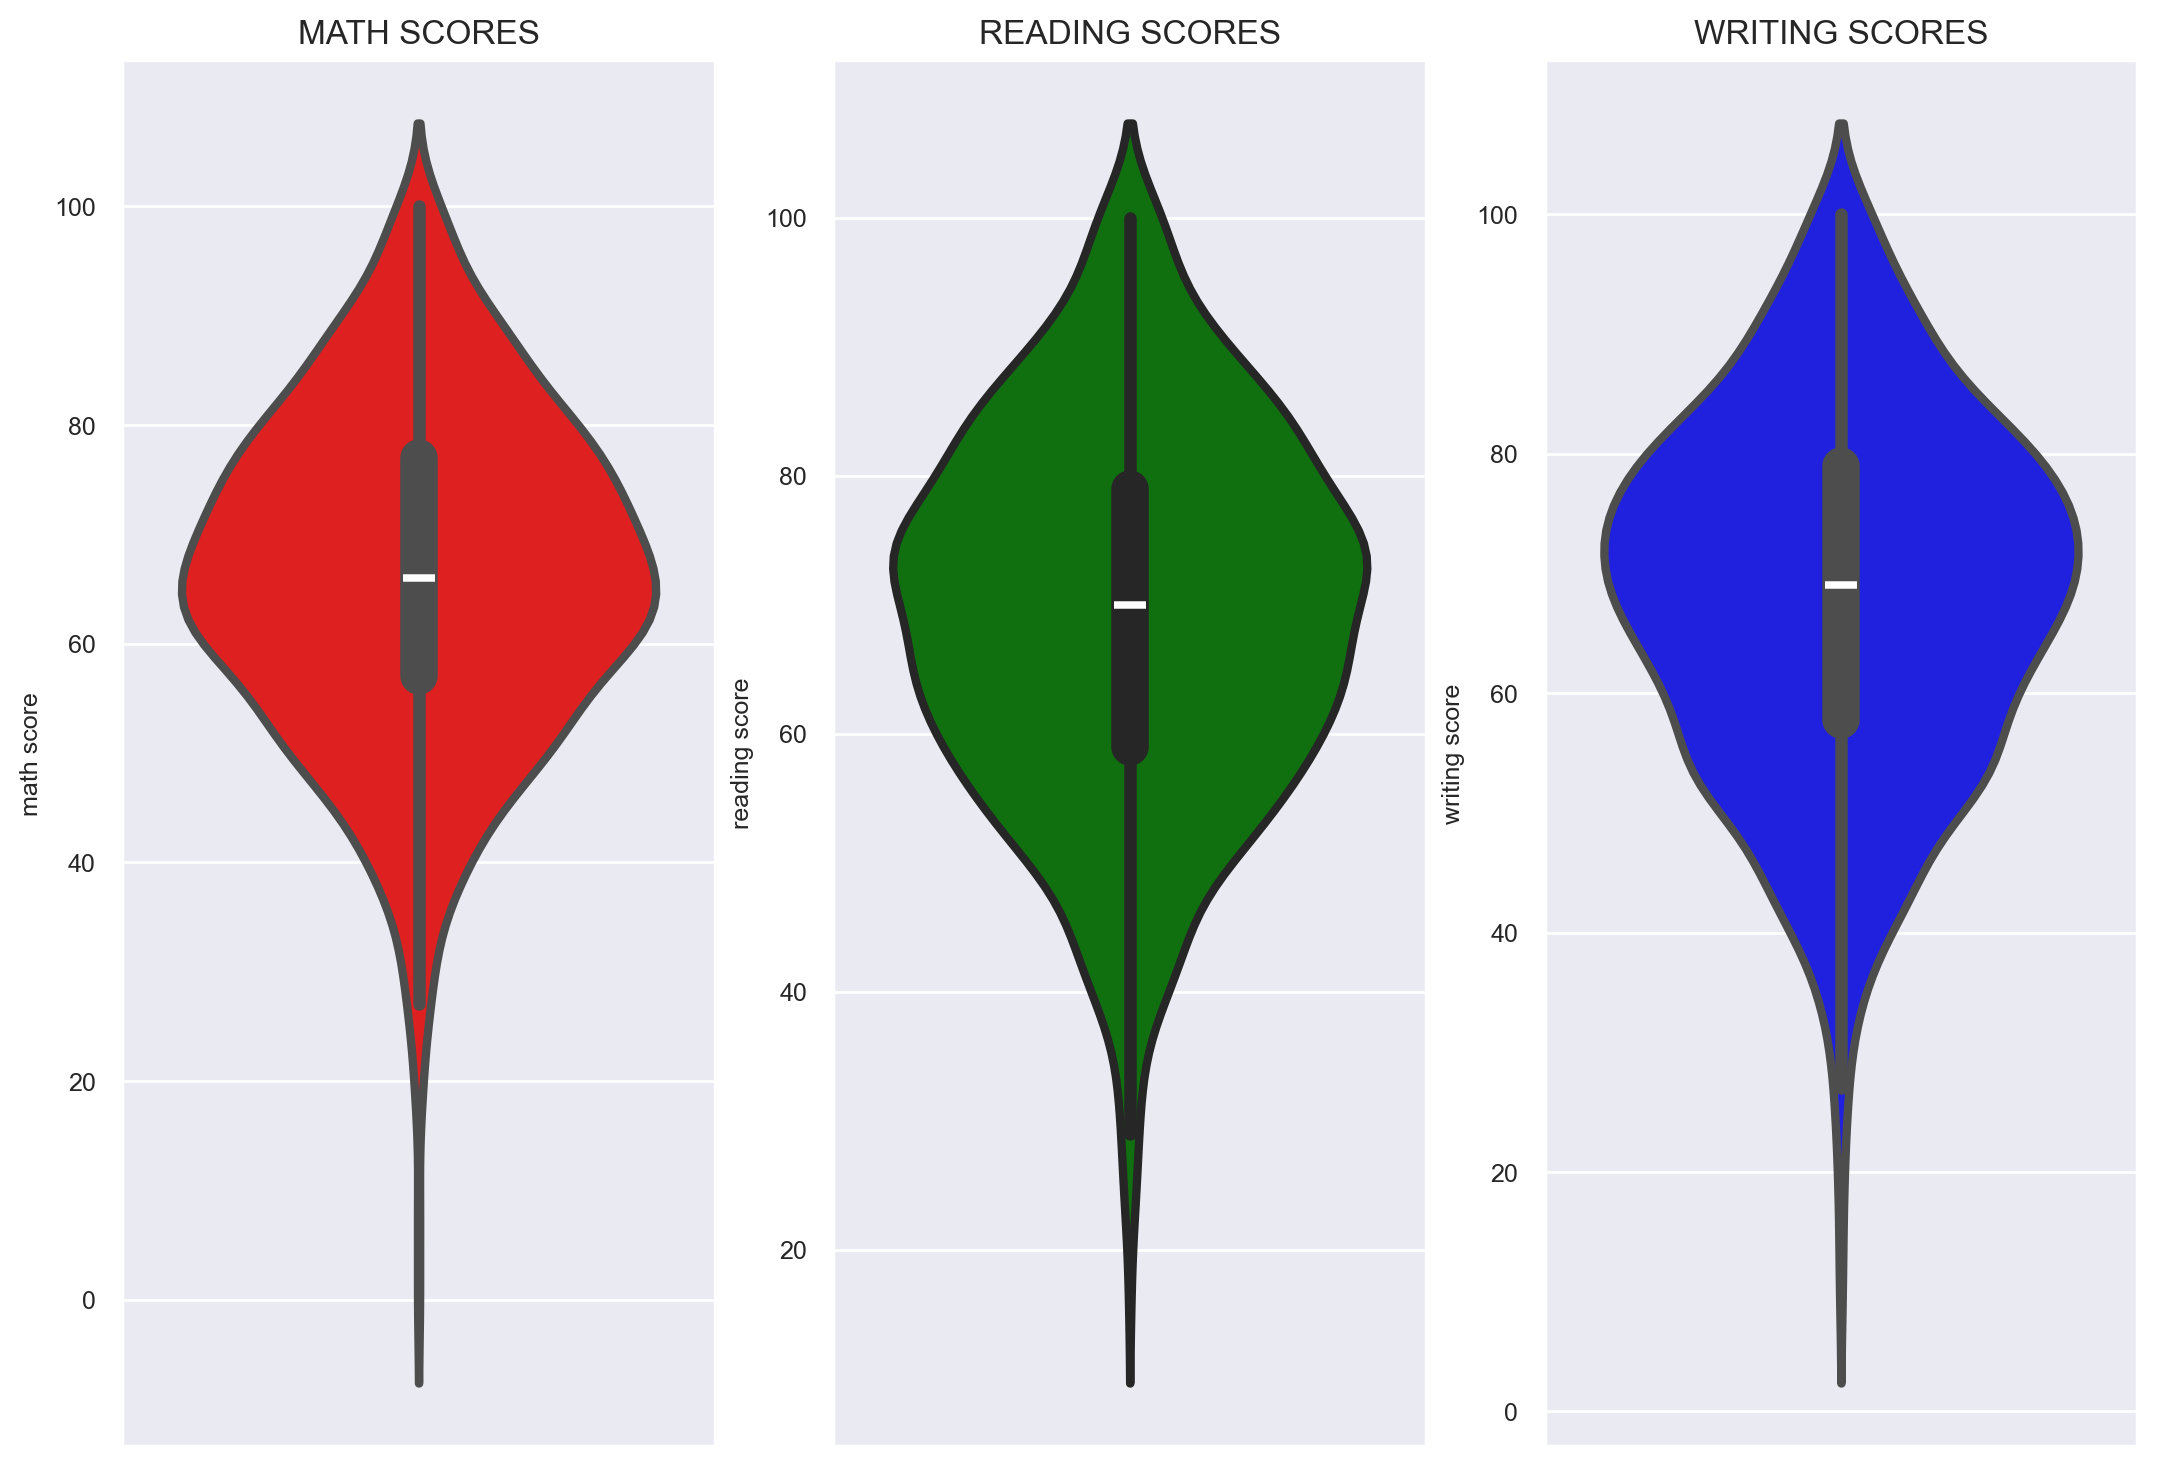

In [26]:
rcparams = {'figure.figsize':(13,9), 'axes.titlesize':12, 'axes.labelsize':9, 'xtick.labelsize':9, 'ytick.labelsize':9, 'legend.fontsize':12,'figure.dpi': 200}
sns.set(rc=rcparams)

fig,axs = plt.subplots(1,3)

sns.violinplot(y='math score',data=df,color='red',linewidth=3,ax=axs[0])
axs[0].set_title('MATH SCORES')


sns.violinplot(y='reading score',data=df,color='green',linewidth=3,ax=axs[1])
axs[1].set_title('READING SCORES')


sns.violinplot(y='writing score',data=df,color='blue',linewidth=3,ax=axs[2])
axs[2].set_title('WRITING SCORES')

plt.show()

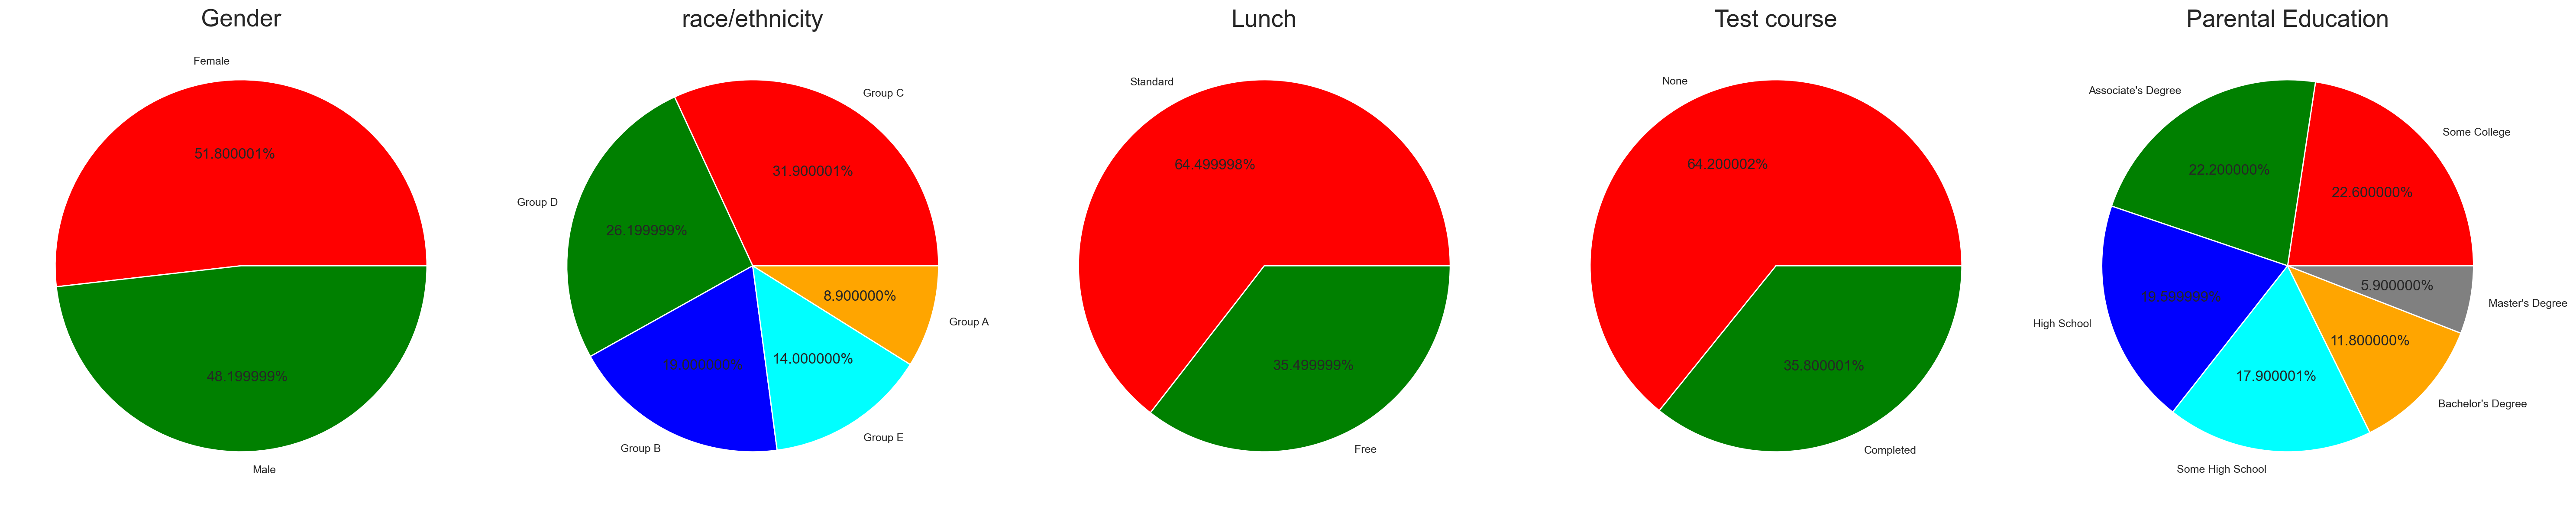

In [32]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('race/ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size,colors = color,labels= labels,autopct = '%2f%%')
plt.title('Test course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()



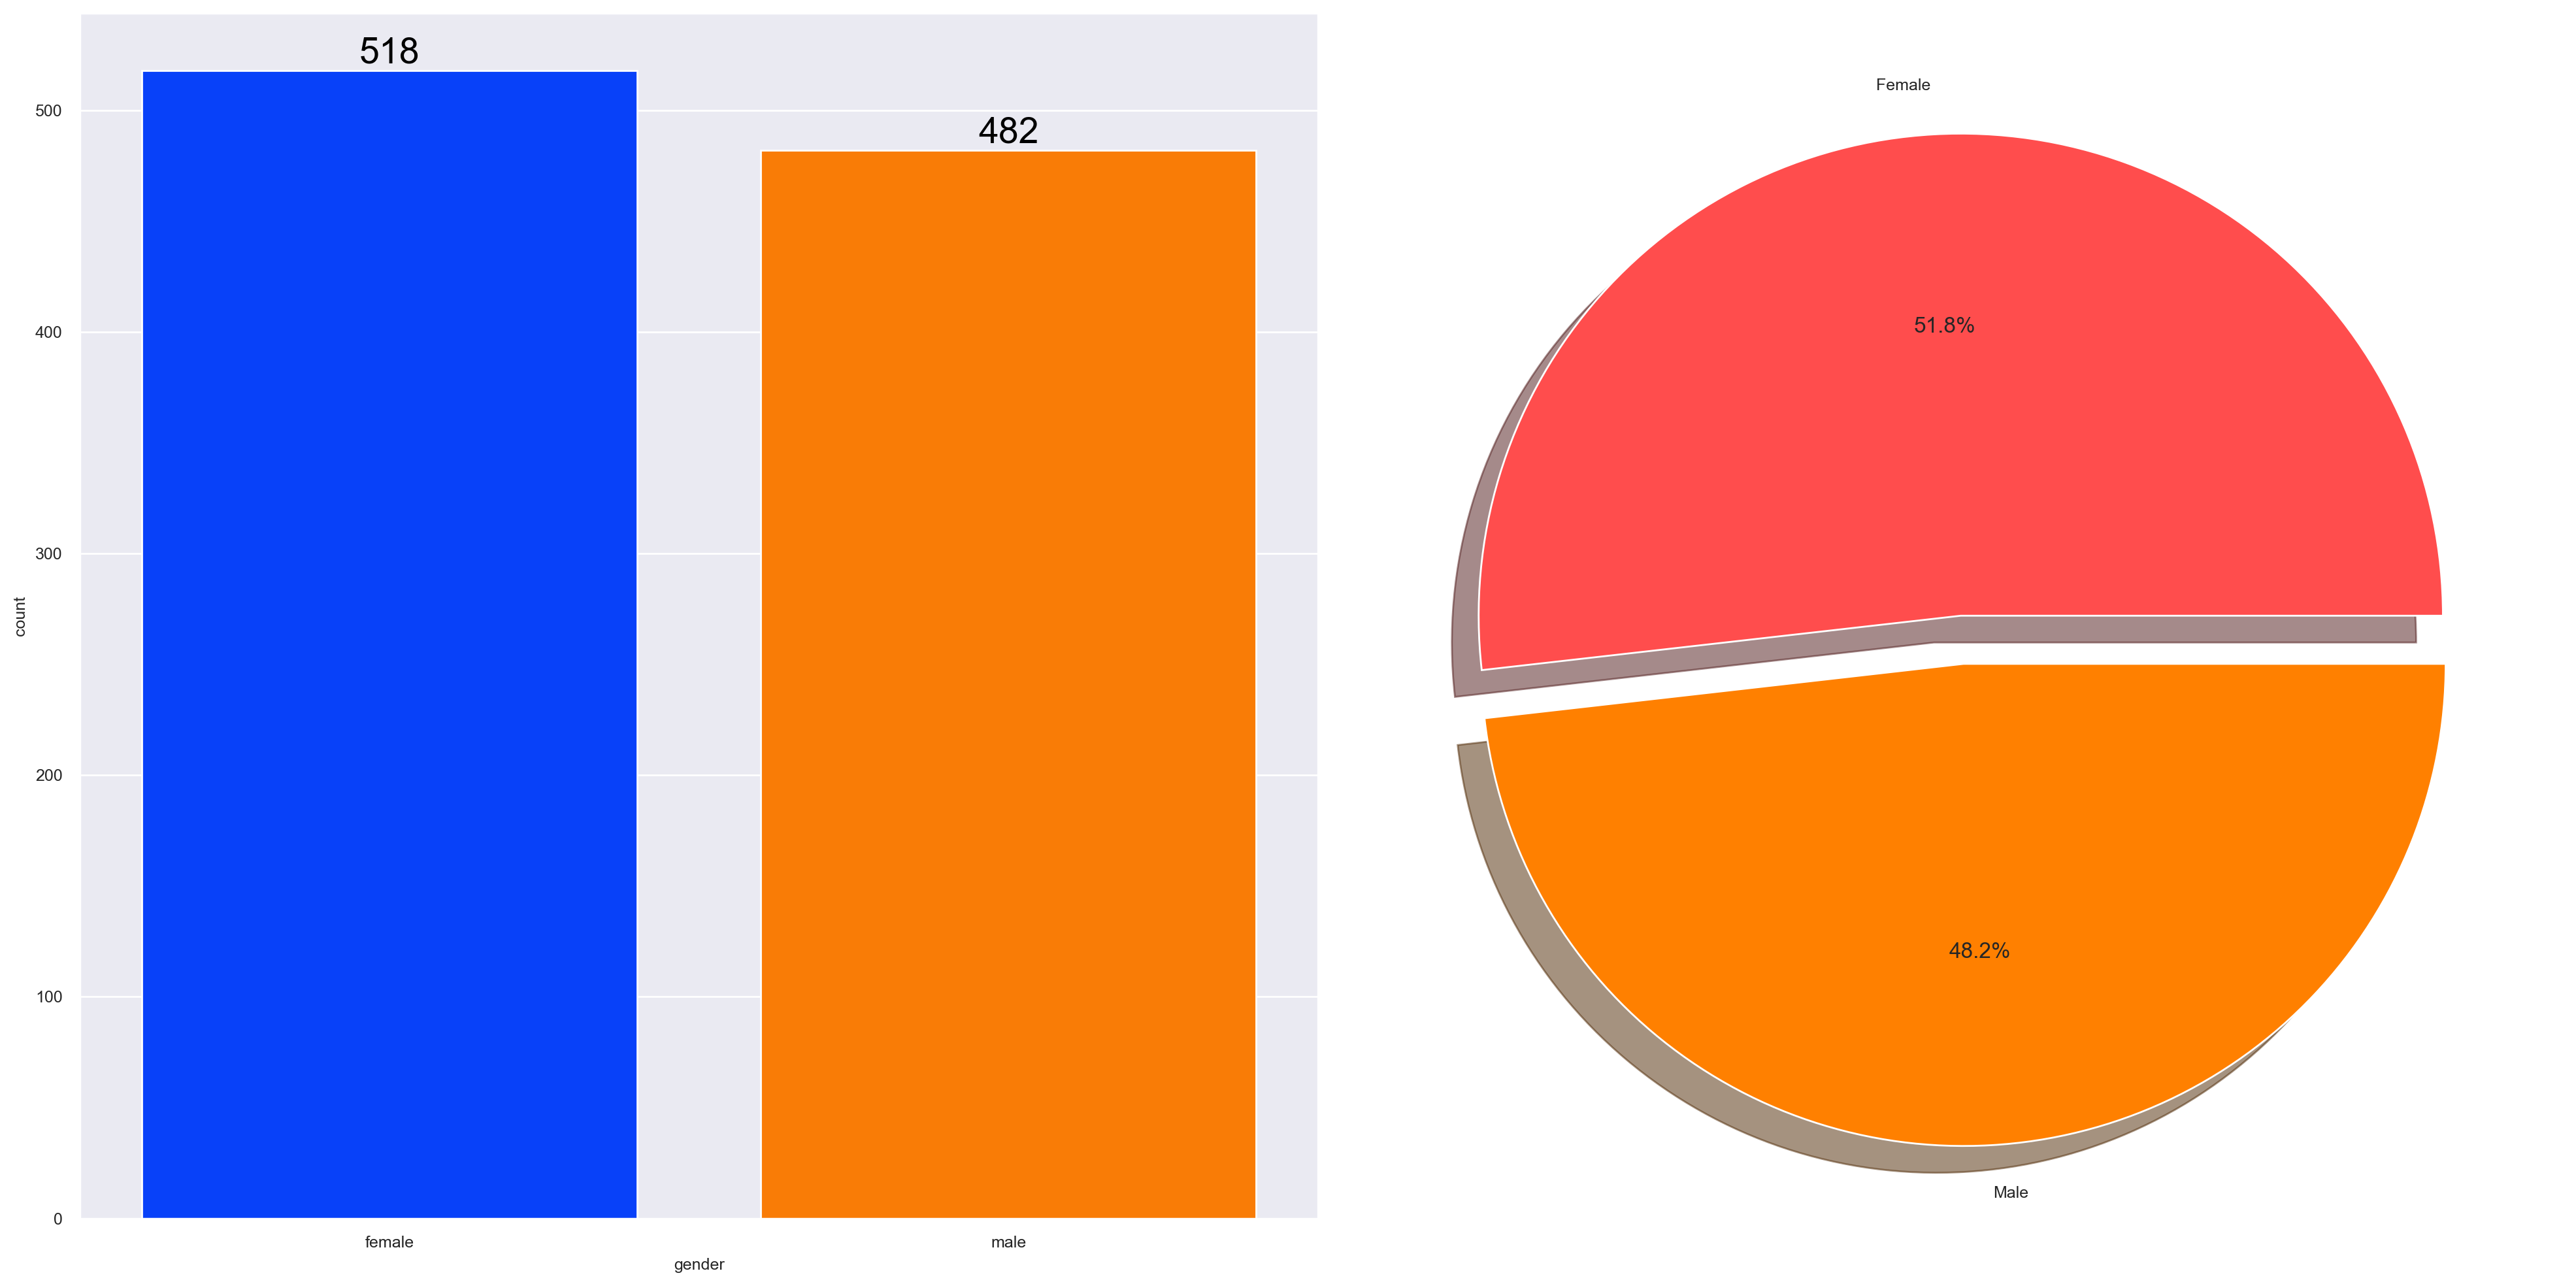

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'],labels = ['Female','Male'])
plt.show()

In [40]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


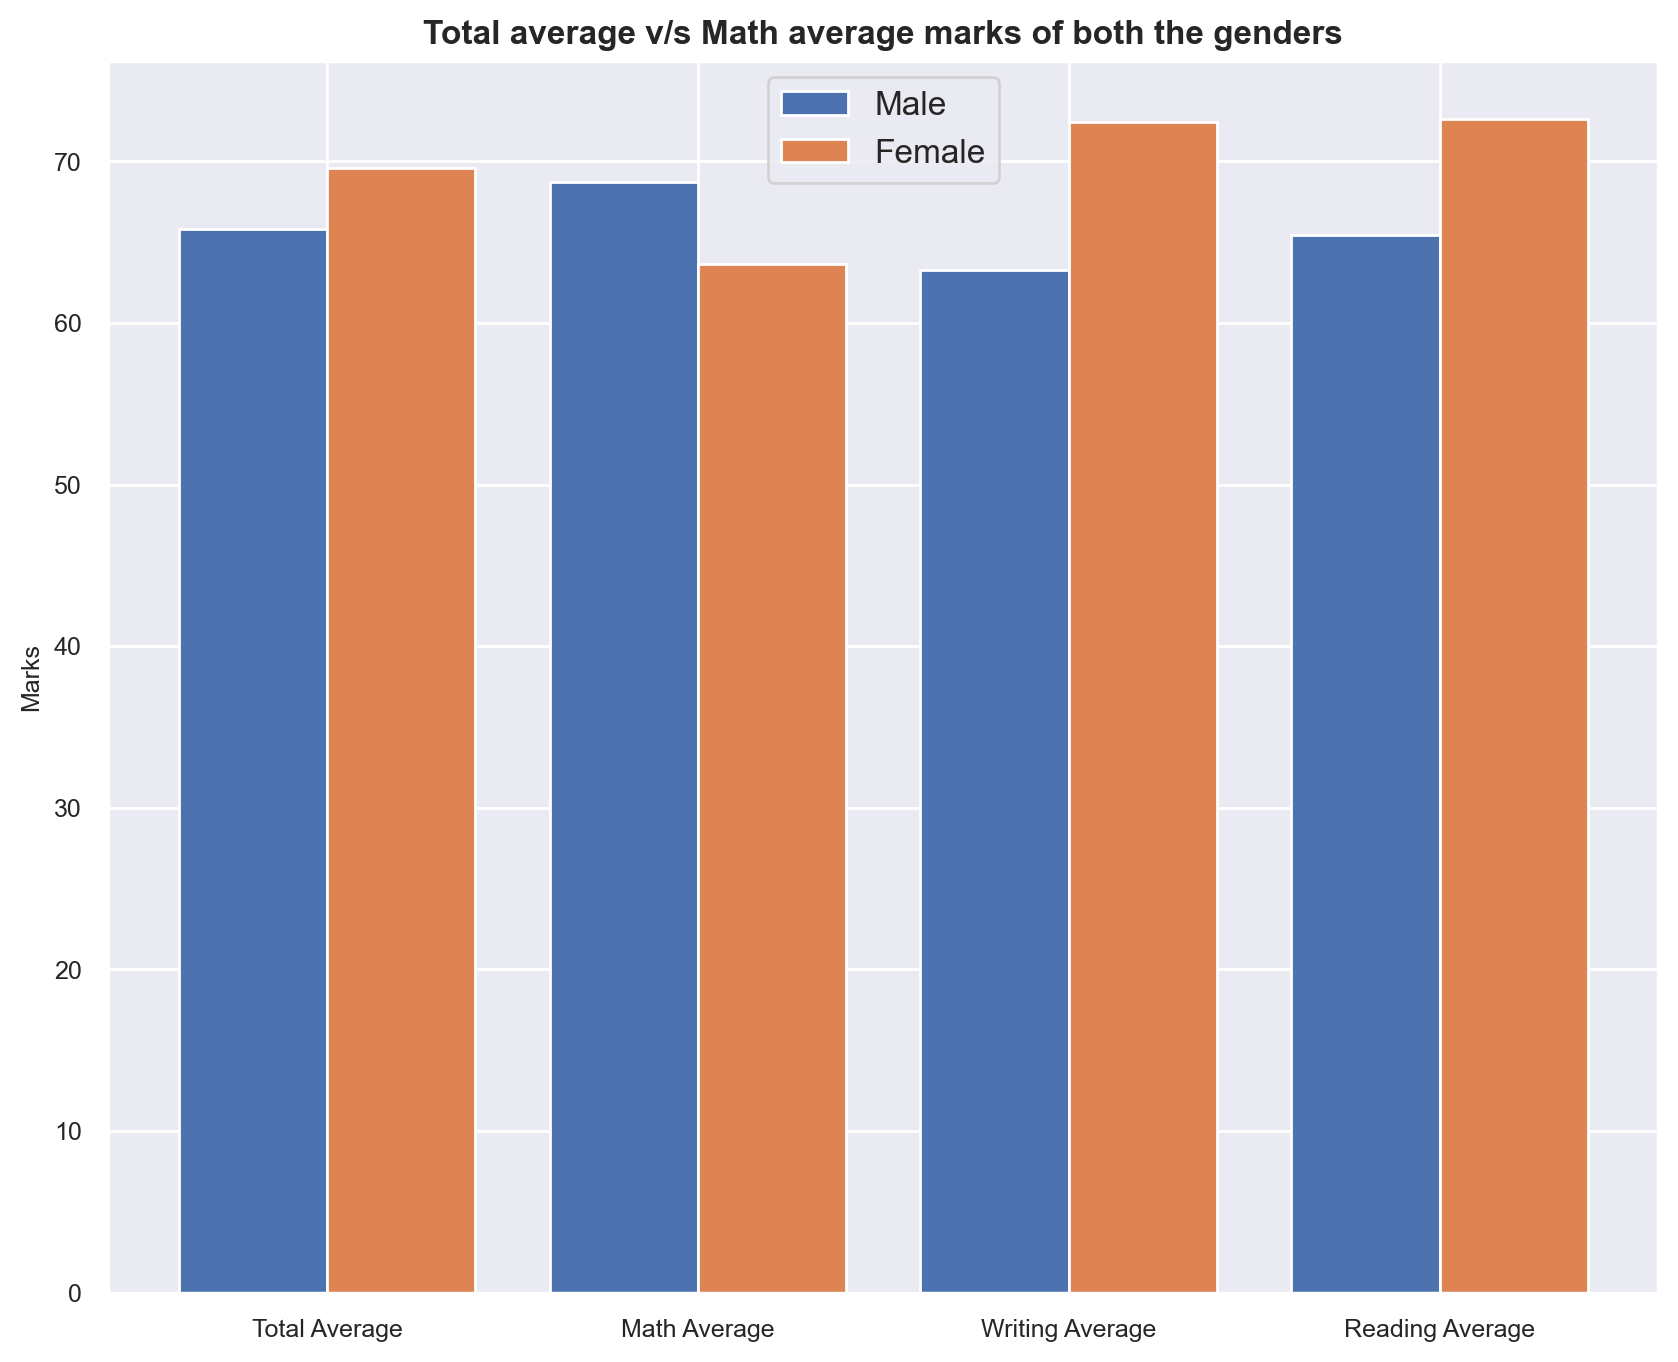

In [43]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average','Writing Average','Reading Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0], gender_group['writing score'][0],gender_group['reading score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1],gender_group['writing score'][1],gender_group['reading score'][1]]

X_axis = np.arange(len(X)) # Giving a common axes for both the bars
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

In [44]:
(df['race/ethnicity'].value_counts())

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

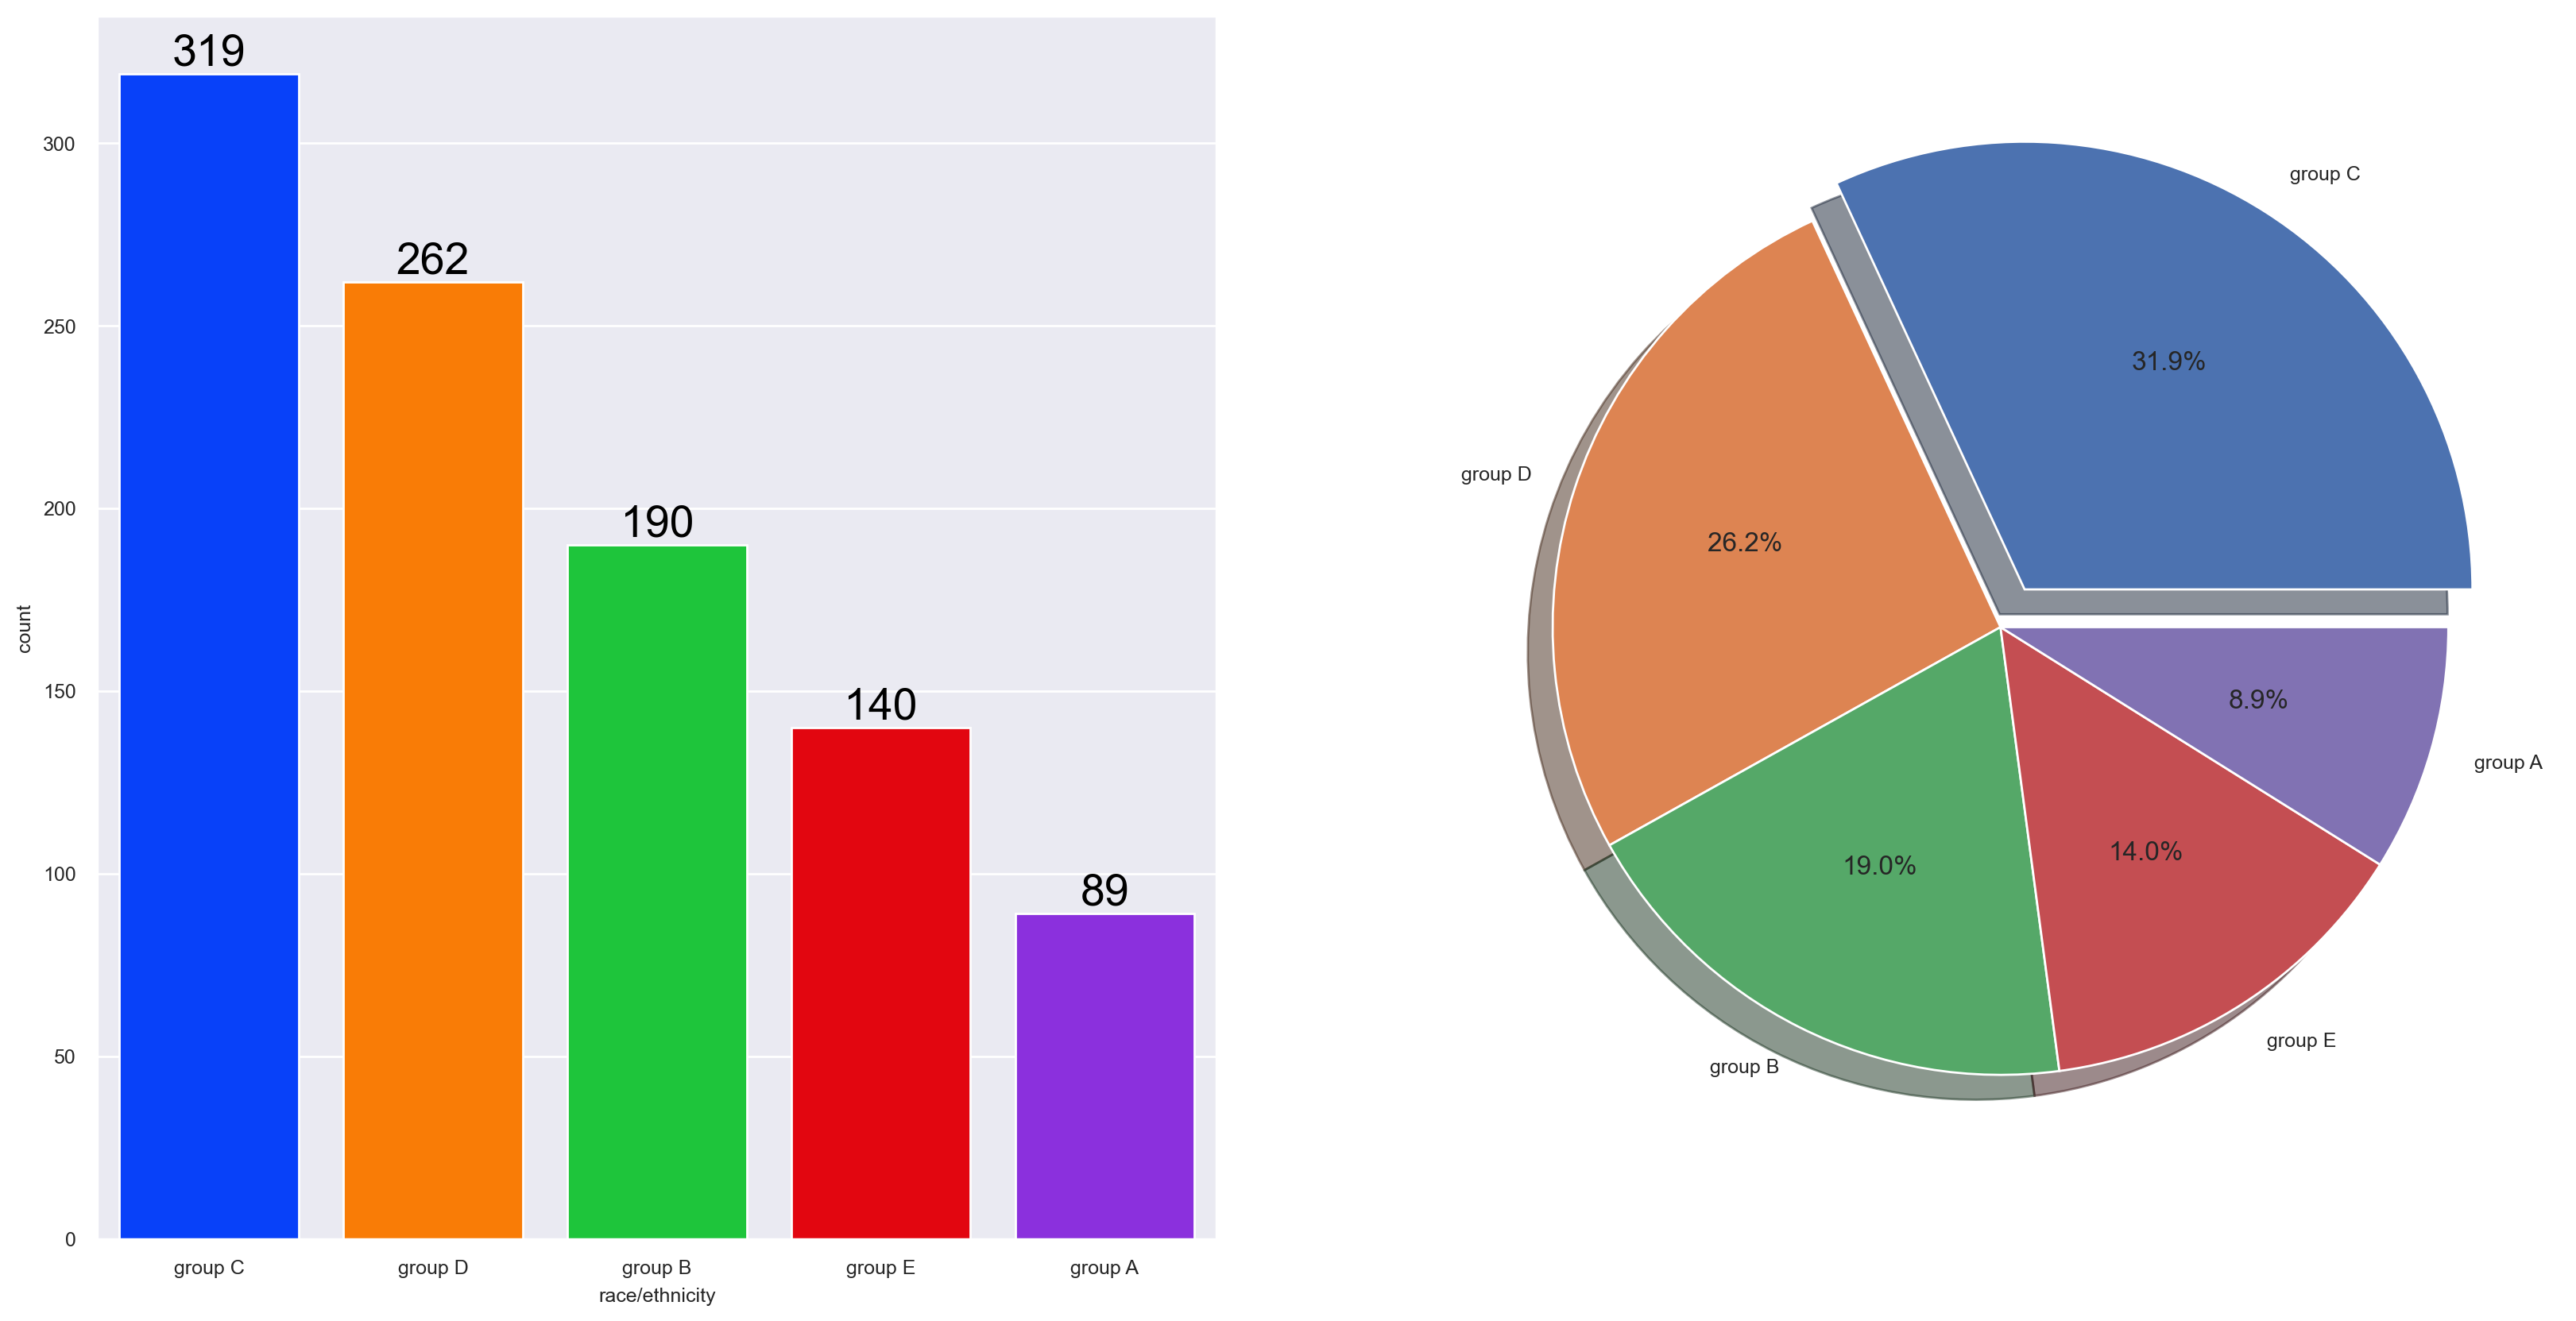

In [49]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95,order=(df['race/ethnicity'].value_counts().index))
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = (df['race/ethnicity'].value_counts()),labels=(df['race/ethnicity'].value_counts()).index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

In [55]:
df.groupby('race/ethnicity').agg('mean').plot(kind='bar',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

TypeError: Could not convert malemalefemalemalefemalemalemalefemalemalemalefemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalefemalefemalemalefemalemalemalefemalefemalemalefemalefemalemalemalemalefemalemalemalefemalemalemalemalefemalemalemalemalefemalefemalemalemalefemalemalemalefemalefemalemalefemalemalemalemalefemalemalefemalemalemalemalefemalefemalefemalemalefemalefemalefemalefemalefemalemalemalefemalemalefemalefemalefemalemalefemalemale to numeric